In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

In [35]:
spx = pd.read_csv('S&P500.csv',index_col = 0,parse_dates=True,dayfirst=True)[['Adj Close']]
spx.head(3).append(spx.tail(3))

,Adj Close
Date,
2007-01-03,1416.599976
2007-01-04,1418.339966
2007-01-05,1409.709961
2009-12-29,1126.199951
2009-12-30,1126.420044
2009-12-31,1115.099976


In [36]:
vix = pd.read_csv('VIX.csv',index_col = 0,parse_dates=True,dayfirst=True)[['Adj Close']]
vix.head(3).append(vix.tail(3))

,Adj Close
Date,
2007-01-03,12.040000
2007-01-04,11.510000
2007-01-05,12.140000
2009-12-29,20.010000
2009-12-30,19.959999
2009-12-31,21.680000


In [37]:
r_hex = '#dc2624'  # red,              RGB = 220,38,36
dt_hex = '#2b4750' # dark teal,        RGB = 43,71,80

(-1, 757)

(7.912000000000001, 1878.1800288)

[Text(0,0,'2007-01-03'),
 Text(0,0,'2007-03-02'),
 Text(0,0,'2007-04-30'),
 Text(0,0,'2007-06-26'),
 Text(0,0,'2007-08-22'),
 Text(0,0,'2007-10-18'),
 Text(0,0,'2007-12-14'),
 Text(0,0,'2008-02-13'),
 Text(0,0,'2008-04-11'),
 Text(0,0,'2008-06-09'),
 Text(0,0,'2008-08-05'),
 Text(0,0,'2008-10-01'),
 Text(0,0,'2008-11-26'),
 Text(0,0,'2009-01-27'),
 Text(0,0,'2009-03-25'),
 Text(0,0,'2009-05-21'),
 Text(0,0,'2009-07-20'),
 Text(0,0,'2009-09-15'),
 Text(0,0,'2009-11-10')]

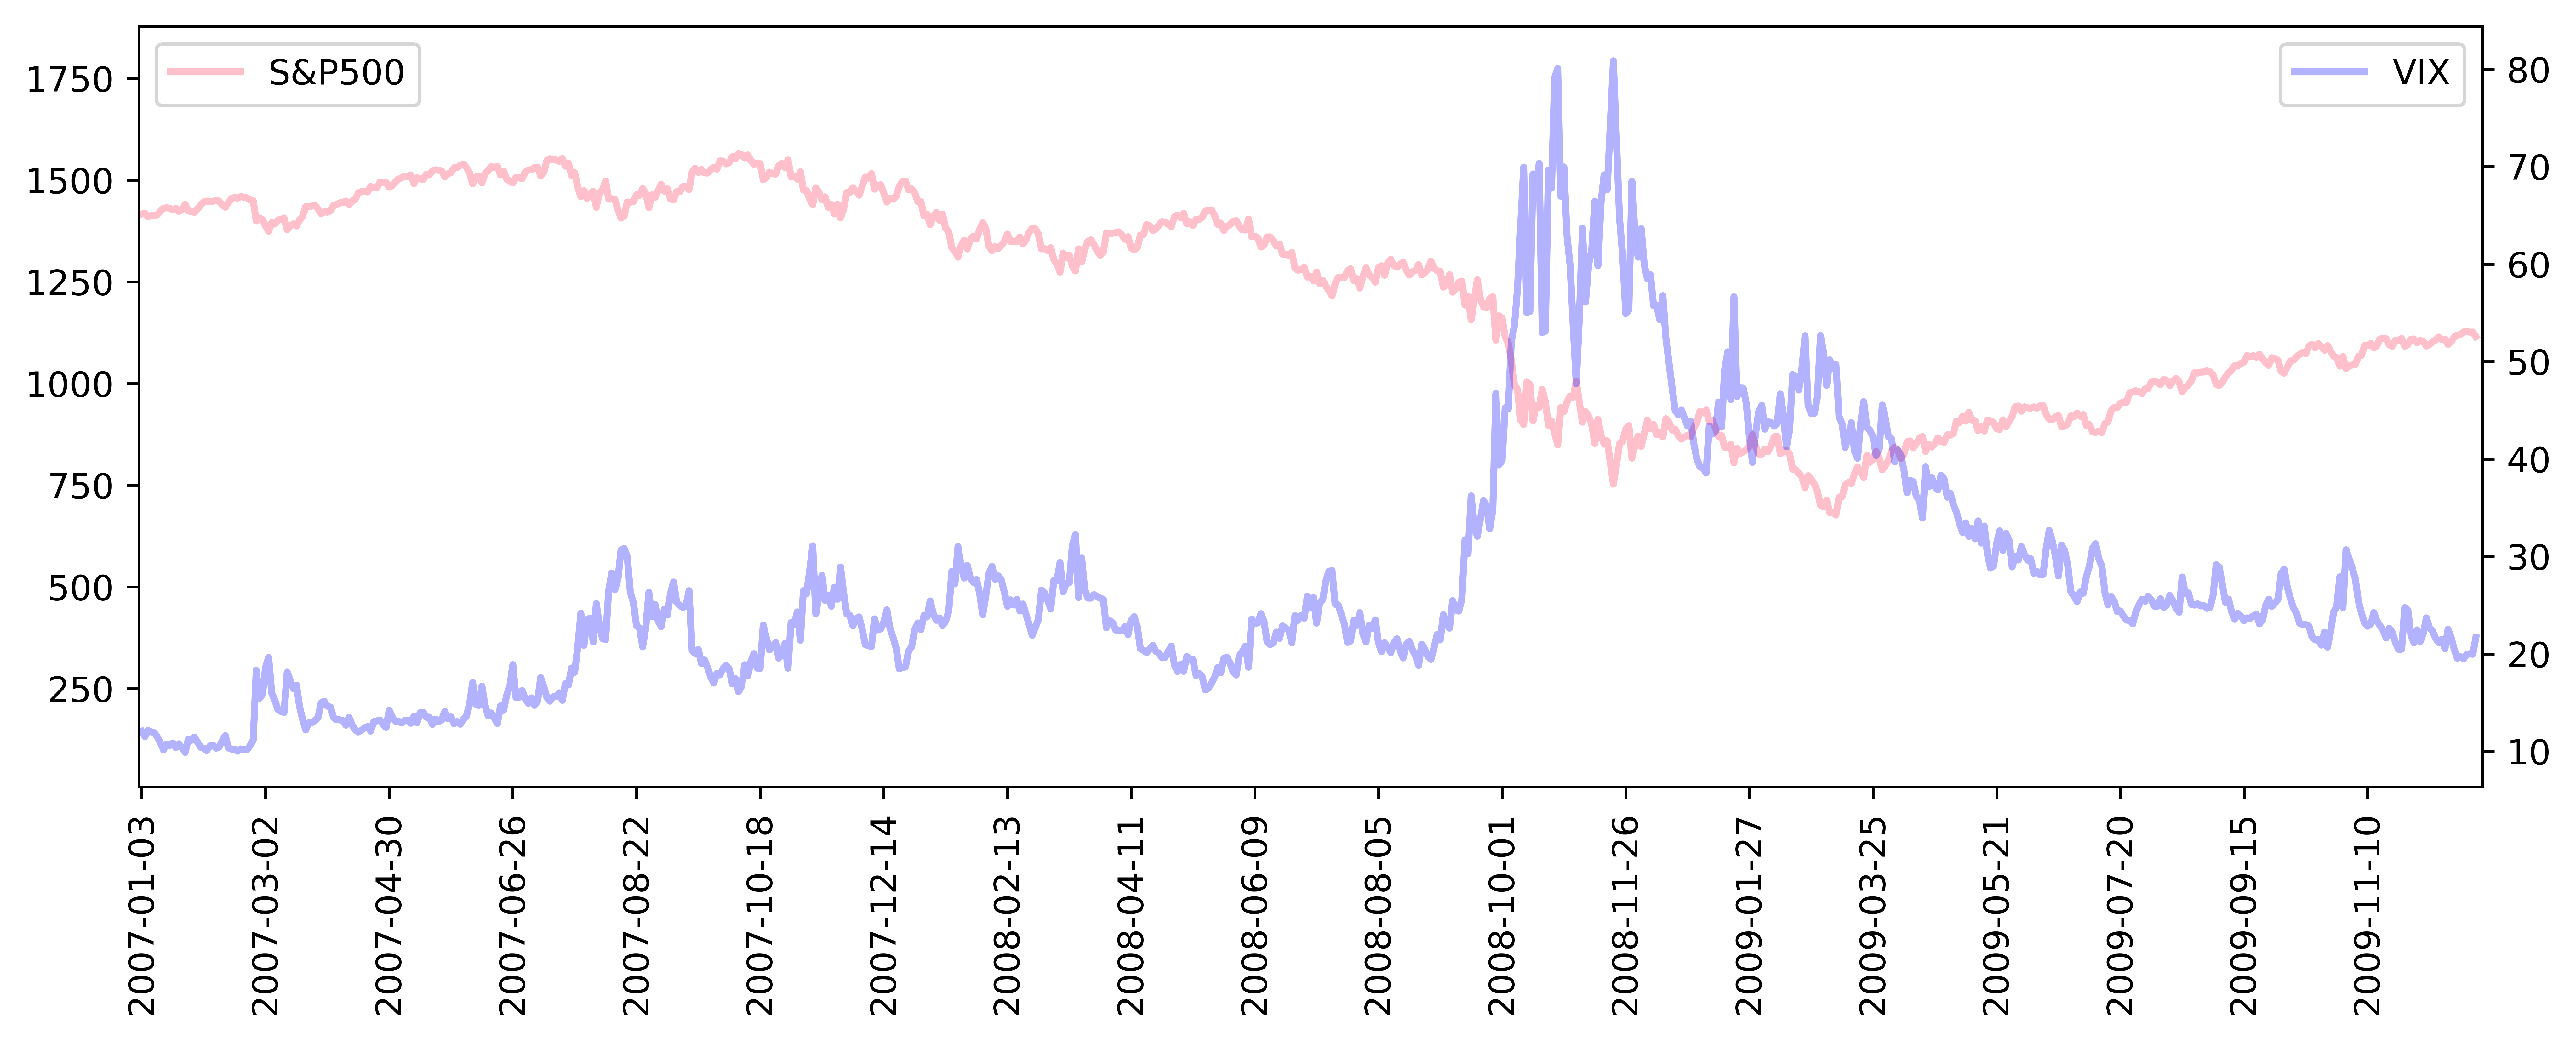

In [49]:
# 简单画
fig = plt.figure(figsize=(12,4),dpi = 800)
ax1 = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot(y1,color = 'pink',linewidth = 2,linestyle = '-',label = 'S&P500')
ax1.set_xlim(-1,len(x)+1)
ax1.set_ylim(np.vstack([y1,y2]).min()*0.8,np.vstack([y1,y2]).max()*1.2)
ax1.legend(loc = 'upper left',frameon = True)

ax1.set_xticks(range(0,len(x),40))
ax1.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax1.get_xticks()],rotation = 90)

ax2 = ax1.twinx()
ax2.plot(y2,color = 'blue',linewidth = 2,linestyle = '-',label = 'VIX',alpha = 0.3)
ax2.legend(loc = 'upper right',frameon=True)

(-1, 757)

(7.912000000000001, 1878.1800288)

Text(195,1854.41,'Peak of bull market')

Text(299,1608.77,'Bear Stearns Fails')

Text(428,1492.7,'Lehman Bankruptcy')

Text(515,1105.22,'RBS Sell-off')

Text(566,1134.38,'G20 Summit')

[Text(0,0,'2007-01-03'),
 Text(0,0,'2007-03-02'),
 Text(0,0,'2007-04-30'),
 Text(0,0,'2007-06-26'),
 Text(0,0,'2007-08-22'),
 Text(0,0,'2007-10-18'),
 Text(0,0,'2007-12-14'),
 Text(0,0,'2008-02-13'),
 Text(0,0,'2008-04-11'),
 Text(0,0,'2008-06-09'),
 Text(0,0,'2008-08-05'),
 Text(0,0,'2008-10-01'),
 Text(0,0,'2008-11-26'),
 Text(0,0,'2009-01-27'),
 Text(0,0,'2009-03-25'),
 Text(0,0,'2009-05-21'),
 Text(0,0,'2009-07-20'),
 Text(0,0,'2009-09-15'),
 Text(0,0,'2009-11-10'),
 Text(0,0,'2007-10-11'),
 Text(0,0,'2008-03-12'),
 Text(0,0,'2008-09-15'),
 Text(0,0,'2009-01-20'),
 Text(0,0,'2009-04-02')]

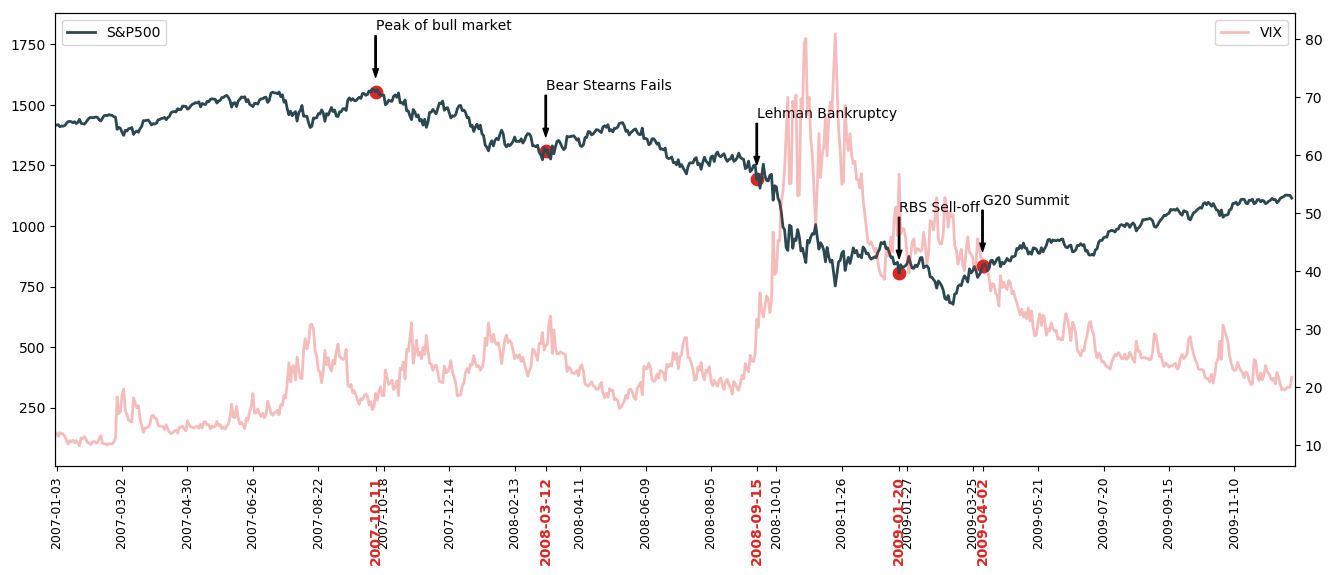

In [33]:
fig = plt.figure(figsize=(16,6),dpi = 100)

crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy'),
    (datetime(2009,1,20),'RBS Sell-off'),
    (datetime(2009,4,2),'G20 Summit')
]

ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot(y1,color = dt_hex,linewidth = 2,linestyle = '-',label = 'S&P500')
ax1.set_xlim(-1,len(x)+1)
ax1.set_ylim(np.vstack([y1,y2]).min()*0.8,np.vstack([y1,y2]).max()*1.2)
ax1.legend(loc = 'upper left',frameon = True)

init_tick = list(range(0,len(x),40))
impt_tick = []
impt_date = []

for date,label in crisis_data:
    date = date.strftime('%Y-%m-%d')
    impt_date.append(date)
    
    xi = x.get_loc(date)
    impt_tick.append(xi)
    yi = spx.asof(date)
    
    ax1.scatter(xi,yi,80,color = r_hex)
    ax1.annotate(label,
                 xy = (xi,yi + 60),
                 xytext = (xi,yi + 300),
                 arrowprops = dict(facecolor = 'black',headwidth = 4,width = 1,headlength = 6),
                 horizontalalignment = 'left',verticalalignment = 'top')
    
x_tick = init_tick + impt_tick
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,rotation = 90)

for i,label in enumerate(ax1.get_xticklabels()):
    if i >= len(init_tick):
        label.set_color(r_hex)
        label.set_fontweight('bold')
    else:
        label.set_fontsize(9)
        
# Add a second axes
ax2 = ax1.twinx()
ax2.plot(y2,color = r_hex,linewidth = 2,linestyle = '-',label = 'VIX',alpha = 0.3)
ax2.legend(loc = 'upper right',frameon=True)